# SQL DEVELOPER INTERN @ PSYLIQ

## AUTHOR : PARVEJ ALAM M. ANSARI

# TASK 3 : PAYTM DATA ANALYTICS

# 1. Connect Notebook with MySQL Database

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [3]:
# MySQL database connection details
host = 'YOUR_HOST_NAME'
user = 'YOUR_USER_NAME'
password = 'YOUR_PASSWORD'

In [4]:
# CSV file path
csv_file = 'paytm_data.csv'  # Replace 'your_file.csv' with your CSV file path

# Read the first row of the CSV to extract column names
with open(csv_file, 'r') as file:
    first_line = file.readline().strip()  # Read the first line
    column_names = first_line.split(',')  # Assuming columns are comma-separated
    file.close()

In [5]:
# Create MySQL connection
conn = mysql.connector.connect(host=host, user=user, password=password)
cursor = conn.cursor()

In [6]:
# Name of database
database = str(input("Enter database name: "))

# Create the database if it doesn't exist
create_db_query = f"CREATE DATABASE IF NOT EXISTS {database}"
cursor.execute(create_db_query)

# Close the connection as the database is created
conn.close()

Enter database name: paytmanalytics


In [7]:
# Reconnect to the newly created or existing database
conn = mysql.connector.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

In [8]:
column_names

['S.no',
 'Name',
 'Shipping_city',
 'Category_Grouped',
 'Category',
 'Sub_category',
 'Product_Gender',
 'Segment',
 'Class',
 'Family',
 'Brand',
 'Brick',
 'Item_NM',
 'Color',
 'Size',
 'Sale_Flag',
 'Payment_Method',
 'coupon_money_effective',
 'Coupon_Percentage',
 'Quantity',
 'Cost_Price',
 'Item_Price',
 'Special_Price_effective',
 'paid_pr_effective',
 'Value_CM1',
 'Value_CM2',
 'Special_price',
 'Paid_pr']

In [9]:
# Ask for table name
table_name = input("Enter table name: ")

# Create table with extracted column names
create_table_query = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({', '.join([f'`{col}` TEXT' for col in column_names])})"
cursor.execute(create_table_query)

Enter table name: paytm_table


In [10]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file)
df.head()

,S.no,Name,Shipping_city,Category_Grouped,Category,Sub_category,Product_Gender,Segment,Class,Family,...,Coupon_Percentage,Quantity,Cost_Price,Item_Price,Special_Price_effective,paid_pr_effective,Value_CM1,Value_CM2,Special_price,Paid_pr
0,1,ABHINAV CHATTER,Jabalpur,Others,SUNGLASSES,SUNGLASSES,UNISEX,SUNGLASSES,AVIATOR,UNISEX,...,0.0,1,2294.54,4999,4999.0,4544.38,1722.77,1134.77,4999,4544
1,2,AMIT GALPHADE,Ahmedabad,Apparels,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS,SPORT & ADVENTURE,...,NaN,1,2919.33,4999,4999.0,4999.00,1499.87,876.87,4999,4999
2,3,PRABHU NAMBIAPP,Chennai,Others,Bags,Bags,UNISEX,UNISEX,NaN,NaN,...,NaN,1,2186.66,4095,4095.0,4095.00,1433.07,955.07,4095,4095
3,4,MALLIKARJUNA H,Bangalore,Apparels,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS,SPORT & ADVENTURE,...,NaN,1,2919.33,4999,4999.0,4999.00,1499.87,876.87,4999,4999
4,5,ANUPAM UPADHYAY,Gurgaon,NaN,Men Footwear,Mens Footwear,MEN,MENS FOOTWEAR,NaN,SPORTS,...,25.0,1,5167.83,7495,7495.0,5621.25,-198.99,-357.99,7495,5621


In [11]:
# Checking shape of dataset
df.shape

(50846, 28)

In [12]:
# Checking column names
df.columns

Index(['S.no', 'Name', 'Shipping_city', 'Category_Grouped', 'Category',
       'Sub_category', 'Product_Gender', 'Segment', 'Class', 'Family', 'Brand',
       'Brick', 'Item_NM', 'Color', 'Size', 'Sale_Flag', 'Payment_Method',
       'coupon_money_effective', 'Coupon_Percentage', 'Quantity', 'Cost_Price',
       'Item_Price', 'Special_Price_effective', 'paid_pr_effective',
       'Value_CM1', 'Value_CM2', 'Special_price', 'Paid_pr'],
      dtype='object')

In [13]:
# Insert data into the created table
for _, row in df.iterrows():
    # Handle NaN values by converting them to None
    row = [None if pd.isna(value) else value for value in row]
    
    # Prepare and execute the insert query
    insert_query = f"INSERT INTO `{table_name}` ({', '.join([f'`{col}`' for col in column_names])}) VALUES ({', '.join(['%s'] * len(column_names))})"
    cursor.execute(insert_query, tuple(row))

# Commit changes and close the connection
conn.commit()
conn.close()

print(f"Table '{table_name}' created and data loaded successfully.")

Table 'paytm_table' created and data loaded successfully.


# 2. Excess Database Information as per your Requirement

In [14]:
# Pass the query through this function ant get your results
from IPython.display import display

def execute_query(query):
    
    # MySQL database connection details
    host = 'YOUR_HOST_NAME'
    user = 'YOUR_USER_NAME'
    password = 'YOUR_PASSWORD'
    database = 'paytmanalytics'  # Replace with your database name

    # Connect to MySQL
    conn = mysql.connector.connect(host=host, user=user, password=password, database=database)

    # Create a cursor
    cursor = conn.cursor()

    result_df = None  # Initialize result_df to None

    try:
        # Execute the query
        cursor.execute(query)

        # Fetch all results
        results = cursor.fetchall()

        # Display results in a table format
        if results:
            header = [desc[0] for desc in cursor.description]
            data = list(results)
            result_df = pd.DataFrame(data, columns=header)
            # display(result_df)
        else:
            print("No results found.")

    except mysql.connector.Error as error:
        print(f"Error: {error.msg}")
        # If an error occurs, result_df will remain None

    finally:
        # Close the cursor and connection
        cursor.close()
        conn.close()

    return result_df  # Return the DataFrame result_df

## 1. What does the "Category_Grouped" column represent, and how many unique categories are there?

In [15]:
# Define the query
query = "SELECT COUNT(DISTINCT Category_Grouped) AS Unique_Categories FROM paytm_table;"
# Call the function with the query
execute_query(query)

,Unique_Categories
0,4


## 2. Can you list the top 5 shipping cities in terms of the number of orders?

In [16]:
# Define the query
query = "SELECT Shipping_city AS Shipping_City, COUNT(*) AS Order_Count FROM paytm_table GROUP BY Shipping_city ORDER BY Order_Count DESC LIMIT 5;"
# Call the function with the query
execute_query(query)

,Shipping_City,Order_Count
0,New Delhi,4560
1,Chennai,4254
2,Bangalore,3974
3,Mumbai,3159
4,Hyderabad,2849


## 3. Show me a table with all the data for products that belong to the "Electronics" category.

In [17]:
# Define the query
query = "SELECT * FROM paytm_table WHERE Category = 'Electronics';"
# Call the function with the query
execute_query(query)

No results found.


## 4. Filter the data to show only rows with a "Sale_Flag" of 'Yes'.

In [18]:
df['Sale_Flag'].value_counts()

Not on Sale    34675
On Sale        16171
Name: Sale_Flag, dtype: int64

In [19]:
# Define the query
query = "SELECT * FROM paytm_table WHERE Sale_Flag = 'On Sale';"
# Call the function with the query
execute_query(query)

,S.no,Name,Shipping_city,Category_Grouped,Category,Sub_category,Product_Gender,Segment,Class,Family,...,Coupon_Percentage,Quantity,Cost_Price,Item_Price,Special_Price_effective,paid_pr_effective,Value_CM1,Value_CM2,Special_price,Paid_pr
0,2,AMIT GALPHADE,Ahmedabad,Apparels,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS,SPORT & ADVENTURE,...,None,1,2919.33,4999,4999.0,4999.0,1499.87,876.87,4999,4999
1,4,MALLIKARJUNA H,Bangalore,Apparels,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS,SPORT & ADVENTURE,...,None,1,2919.33,4999,4999.0,4999.0,1499.87,876.87,4999,4999
2,10,ASHWIN GIDWANI,Pune,Apparels,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS,SPORT & ADVENTURE,...,None,1,2412.0,4020,4020.0,4020.0,1608.0,1430.0,4020,4020
3,16,Rompelli GopalK,Salem,Shoes,Men Footwear,Mens Footwear,MEN,MENS FOOTWEAR,None,SPORTS,...,0.0,1,3211.31,5499,5499.0,4499.0,765.88,349.88,5499,4499
4,20,prabhakar reddy,Jhansi,None,WATCHES,WATCHES,MEN,WOMENS ACCESSORIES,WATCHES,None,...,None,1,2938.8,4799,4799.0,4799.0,1860.2,1581.2,4799,4799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16166,50833,Chandrashekhar,Chennai,Others,WATCHES,WATCHES,WOMEN,WOMEN,WATCHES,None,...,None,1,2978.4,8250,4125.0,4125.0,668.17,281.17,4125,4125
16167,50837,Madhusudhanan M,Madurai,Apparels,Women Apparel,Ethnic,WOMEN,WOMENS WEAR,None,ETHNIC,...,None,1,6386.45,8995,4497.5,4497.5,-1888.95,-2151.95,4498,4498
16168,50839,partha padhi,Bhubaneshwar,Others,WATCHES,WATCHES,UNISEX,UNISEX,WATCHES,None,...,25.0,1,3356.68,5395,5395.0,4046.25,219.96,-8.04,5395,4046
16169,50840,ALAGARASAN CHIN,Hyderabad,Others,WATCHES,WATCHES,WOMEN,WOMEN,WATCHES,None,...,None,1,2610.13,4195,4195.0,4195.0,1098.32,677.32,4195,4195


## 5. Sort the data by "Item_Price" in descending order. What is the most expensive item ?

In [20]:
# Define the query
query = "SELECT * FROM paytm_table ORDER BY Item_Price DESC LIMIT 1;"
# Call the function with the query
execute_query(query)

,S.no,Name,Shipping_city,Category_Grouped,Category,Sub_category,Product_Gender,Segment,Class,Family,...,Coupon_Percentage,Quantity,Cost_Price,Item_Price,Special_Price_effective,paid_pr_effective,Value_CM1,Value_CM2,Special_price,Paid_pr
0,50841,Rajib Ghosh,Kolkata,Others,Jewellery,Jewellery,WOMEN,WOMENS JEWELLERY,None,None,...,None,1,6386.45,8995,4497.5,4497.5,-1888.95,-2151.95,4498,4498


## 6. Apply conditional formatting to highlight all products with a"Special_Price_effective"  value below  $50 in red.

In [21]:
df['Special_Price_effective'].value_counts().sum() < 50

False

In [22]:
# Define the query
query = "SELECT * FROM paytm_table WHERE Special_Price_effective < 50;"
# Call the function with the query
execute_query(query)

No results found.


## 7. Create a pivot table to find the total sales value for each category.

In [23]:
# Define the query
query = "SELECT Category, SUM(Item_Price) AS Total_Sales_Value FROM paytm_table GROUP BY Category;"
# Call the function with the query
execute_query(query)

,Category,Total_Sales_Value
0,SUNGLASSES,21935695.0
1,Sports Equipment,18085020.0
2,Bags,23272288.0
3,Men Footwear,101245089.0
4,Women Footwear,13408398.0
5,WATCHES,62213793.0
6,Women Apparel,44010575.0
7,Furniture,3961755.0
8,Men Apparel,723305.0
9,Jewellery,4549307.0


## 8. Create a bar chart to visualize the total sales for each category.

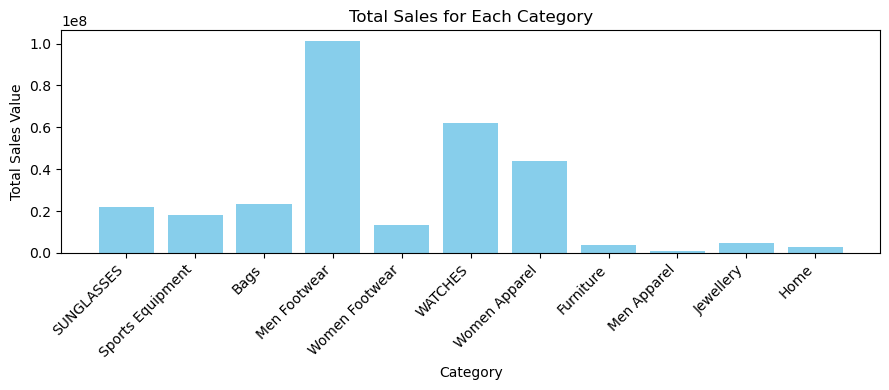

In [24]:
# From Question_7:
df_cat_total_sales = execute_query(query)

# Plotting the bar chart
plt.figure(figsize=(9, 4))
plt.bar(df_cat_total_sales['Category'], df_cat_total_sales['Total_Sales_Value'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.title('Total Sales for Each Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 9. Create a pie chart to show the distribution of products in the "Family" category.

In [25]:
# Define the query
query = "SELECT Family, COUNT(*) AS Product_Count FROM paytm_table GROUP BY Family;"
# Call the function with the query
execute_query(query)

,Family,Product_Count
0,UNISEX,2912
1,SPORT & ADVENTURE,3087
2,None,15533
3,SPORTS,15762
4,CASUAL,3670
5,ETHNIC,6426
6,WOMEN,576
7,TABLES,524
8,EQUIPMENTS,527
9,CASUAL WEAR,121


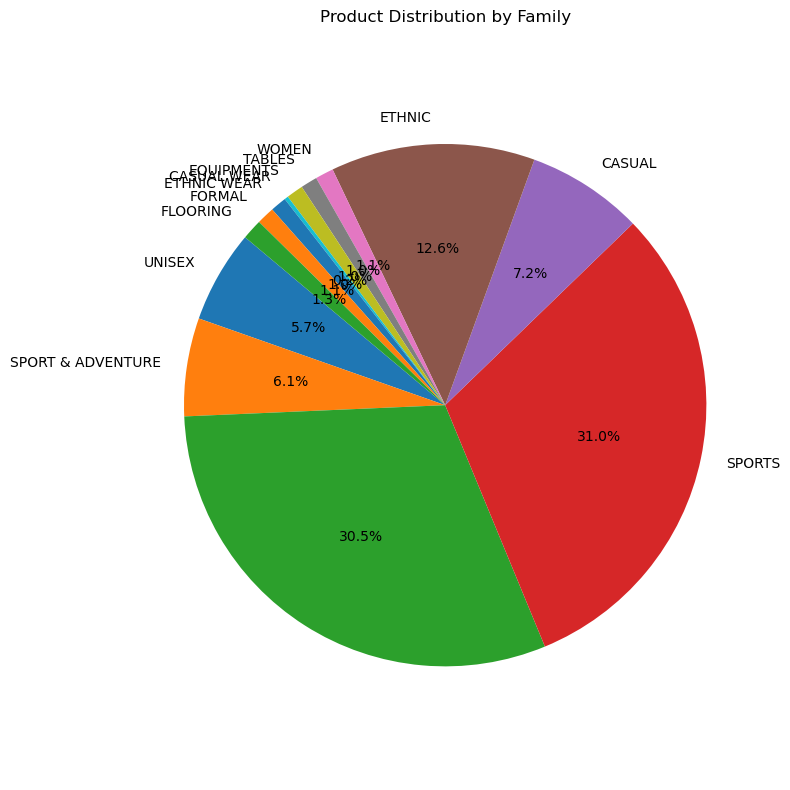

In [26]:
df_prod_distr = execute_query(query)

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Increase the figure size for better visualization
plt.pie(df_prod_distr['Product_Count'], labels=df_prod_distr['Family'], autopct='%1.1f%%', startangle=140)
plt.title('Product Distribution by Family')
plt.axis('equal')
plt.tight_layout()  # Use tight layout for better spacing
plt.show()

## 10. Ensure that the "Payment_Method" column only contains valid [online] payment methods (e.g., Visa, MasterCard).

In [27]:
df['Payment_Method'].value_counts()

COD        38447
Prepaid    12399
Name: Payment_Method, dtype: int64

In [28]:
# Define the query
query = "SELECT * FROM paytm_table WHERE Payment_Method = 'Prepaid';"
# Call the function with the query
execute_query(query)

,S.no,Name,Shipping_city,Category_Grouped,Category,Sub_category,Product_Gender,Segment,Class,Family,...,Coupon_Percentage,Quantity,Cost_Price,Item_Price,Special_Price_effective,paid_pr_effective,Value_CM1,Value_CM2,Special_price,Paid_pr
0,3,PRABHU NAMBIAPP,Chennai,Others,Bags,Bags,UNISEX,UNISEX,None,None,...,None,1,2186.66,4095,4095.0,4095.0,1433.07,955.07,4095,4095
1,5,ANUPAM UPADHYAY,Gurgaon,None,Men Footwear,Mens Footwear,MEN,MENS FOOTWEAR,None,SPORTS,...,25.0,1,5167.83,7495,7495.0,5621.25,-198.99,-357.99,7495,5621
2,7,Abdul Qadir Sha,Kalyan,None,Men Footwear,MENS FOOTWEAR,MEN,MENS FOOTWEAR,None,CASUAL,...,None,1,2589.62,4560,4560.0,4560.0,1441.5,1248.5,4560,4560
3,16,Rompelli GopalK,Salem,Shoes,Men Footwear,Mens Footwear,MEN,MENS FOOTWEAR,None,SPORTS,...,0.0,1,3211.31,5499,5499.0,4499.0,765.88,349.88,5499,4499
4,24,kamla singh,Lucknow,Shoes,Men Footwear,Mens Footwear,MEN,MENS FOOTWEAR,None,SPORTS,...,None,1,3244.0,4990,4990.0,4990.0,1166.85,932.85,4990,4990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12394,50819,deepak khanna,Kanpur,None,Furniture,LIVING,UNISEX,LIVING,None,TABLES,...,None,1,3945.85,5900,4130.0,4130.0,-294.86,-490.86,4130,4130
12395,50832,rupesh pandey,Lucknow,Others,WATCHES,WATCHES,MEN,MEN,WATCHES,None,...,None,1,3686.03,6950,5560.0,5560.0,1229.1,901.1,5560,5560
12396,50836,ABHINAV SANGAL,Mumbai,None,Bags,Bags,WOMEN,WOMEN,None,None,...,None,1,3244.0,4990,4990.0,4990.0,1166.85,932.85,4990,4990
12397,50841,Rajib Ghosh,Kolkata,Others,Jewellery,Jewellery,WOMEN,WOMENS JEWELLERY,None,None,...,None,1,6386.45,8995,4497.5,4497.5,-1888.95,-2151.95,4498,4498


## 11. Calculate the average "Quantity" sold for products in the "Clothing" category, grouped by "Product_Gender.

In [29]:
df['Category'].value_counts()

Men Footwear        17647
WATCHES             10440
Women Apparel        6931
SUNGLASSES           4030
Bags                 3949
Sports Equipment     3614
Women Footwear       2347
Home                  641
Jewellery             602
Furniture             524
Men Apparel           121
Name: Category, dtype: int64

In [30]:
# Define the query
query = "SELECT Product_Gender, AVG(Quantity) AS Avg_Quantity_Sold FROM paytm_table WHERE Category IN ('Women Apparel', 'Men Apparel') GROUP BY Product_Gender;"
# Call the function with the query
execute_query(query)

,Product_Gender,Avg_Quantity_Sold
0,WOMEN,1.0
1,MEN,1.0


## 12. Find the top 5 products with the highest "Value_CM1" and "Value_CM2" ratios. Create a chart to visualize this data.

In [31]:
# Define the query
query = "SELECT Item_NM, Value_CM1, Value_CM2, Value_CM1 / Value_CM2 AS Ratio FROM paytm_table WHERE Value_CM2 != 0 ORDER BY (Value_CM1 / Value_CM2) DESC LIMIT 5;"
# Call the function with the query
execute_query(query)

,Item_NM,Value_CM1,Value_CM2,Ratio
0,Giordano Black Chronograph Watches,473.71,91.71,5.165304
1,Giordano Black Chronograph Watches,473.71,91.71,5.165304
2,ED417-EF-130D-1A2VDF silver Analog Watch,473.71,91.71,5.165304
3,Giordano Black Chronograph Watches,473.71,91.71,5.165304
4,Giordano Black Chronograph Watches,473.71,91.71,5.165304


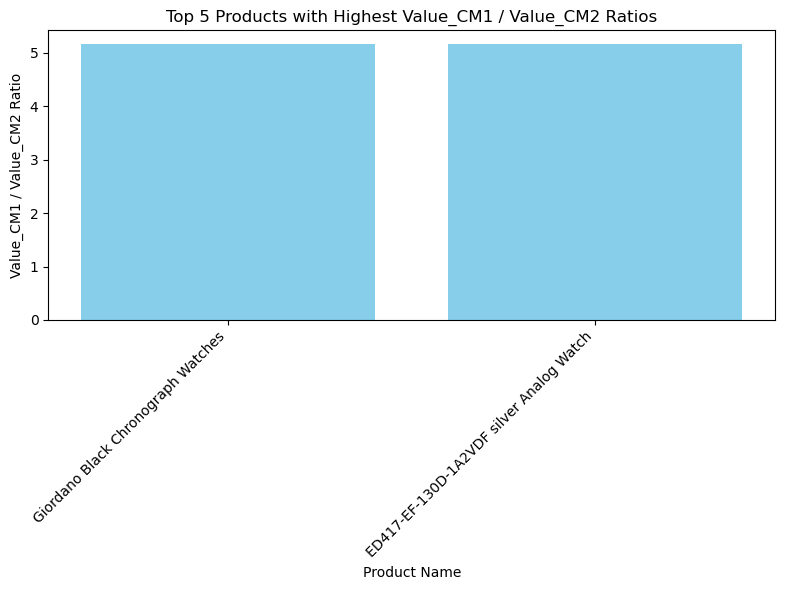

In [32]:
df_top_ratios = execute_query(query)
# Plotting the data
plt.figure(figsize=(8, 6))
plt.bar(df_top_ratios['Item_NM'], df_top_ratios['Ratio'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Value_CM1 / Value_CM2 Ratio')
plt.title('Top 5 Products with Highest Value_CM1 / Value_CM2 Ratios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 13. Identify the top 3 "Class" categories with the highest total sales. Create a stacked bar chart to represent this data.

In [33]:
# Define the query
query = "SELECT Class, SUM(Item_Price) AS Total_Sales FROM paytm_table GROUP BY Class ORDER BY Total_Sales DESC LIMIT 4;"
# Call the function with the query
execute_query(query)

,Class,Total_Sales
0,None,170968090.0
1,WATCHES,62213793.0
2,SETS,25529167.0
3,AVIATOR,15863415.0


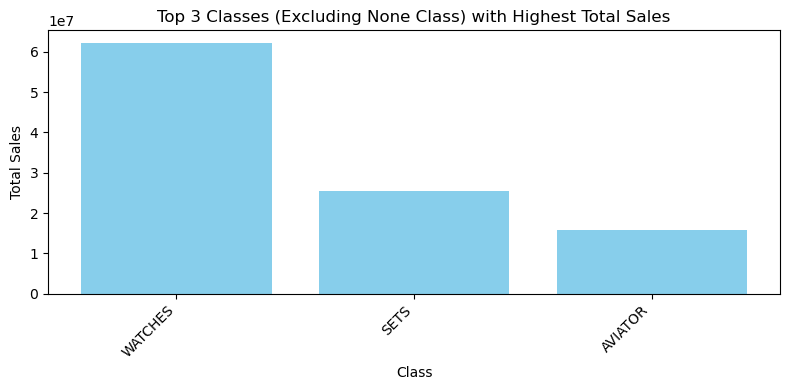

In [34]:
df_top_3_classes = execute_query(query)

# Filter the DataFrame to include only WATCHES, SETS, and AVIATOR classes
filtered_classes = ['WATCHES', 'SETS', 'AVIATOR']
filtered_df = df_top_3_classes[df_top_3_classes['Class'].isin(filtered_classes)]

# Plotting the filtered classes
plt.figure(figsize=(8, 4))

# Extracting data for plotting
classes = filtered_df['Class']
total_sales = filtered_df['Total_Sales']

# Stacked bar chart
plt.bar(classes, total_sales, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Total Sales')
plt.title('Top 3 Classes (Excluding None Class) with Highest Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Use VLOOKUP or INDEX-MATCH to retrieve the "Color" of a product with a specific "Item_NM."

In [35]:
df['Item_NM'].value_counts()

Navy Blue Georgette Brocade Neck & Dupatta Suit Set    3257
SKINS Navy Blue Tights                                 3087
Reebok Sports Shoes Black                              1367
Street Tuneo Mid Black Sneakers                        1169
Tan Boots                                               828
                                                       ... 
Leather Red Handbag                                     478
Rb3025 004 Green Sunglasses                             475
Bpb-0016-C Rose Gold/White Analog Watch                 463
Knee-Length Brown Boots                                 170
Erik Original Twill Jos Beige Casual Trousers           121
Name: Item_NM, Length: 76, dtype: int64

In [36]:
# Define the query
query = "SELECT Color FROM paytm_table WHERE Item_NM = 'Navy Blue Georgette Brocade Neck & Dupatta Suit Set' GROUP BY Color;"
# Call the function with the query
execute_query(query)

,Color
0,NAVY BLUE


In [37]:
# Define the query
query = "SELECT Color FROM paytm_table WHERE Item_NM = 'Street Tuneo Mid Black Sneakers' GROUP BY Color;"
# Call the function with the query
execute_query(query)

,Color
0,BLACK


In [38]:
# Define the query
query = "SELECT Color FROM paytm_table WHERE Item_NM = 'Erik Original Twill Jos Beige Casual Trousers' GROUP BY Color;"
# Call the function with the query
execute_query(query)

,Color
0,BEIGE


## 15. Calculate the total "coupon_money_effective" and "Coupon_Percentage" for products in the "Electronics" category.

In [39]:
# Define the query
query = "SELECT SUM(coupon_money_effective) AS Total_Coupon_Money_Effective, SUM(Coupon_Percentage) AS Total_Coupon_Percentage FROM paytm_table WHERE Category = 'Electronics';"
# Call the function with the query
execute_query(query)

,Total_Coupon_Money_Effective,Total_Coupon_Percentage
0,None,None


## 16. Create a summary report that includes the total sales, average price, and total quantity sold for each product class.

In [40]:
##### REQUIRED COLUMNS ARE NOT PROVIDED IN THE DATASET.

## 17. Calculate the total sales for each "Segment" and create a scatter plot to visualize the relationship between "Item_Price" and "Quantity" in this data.

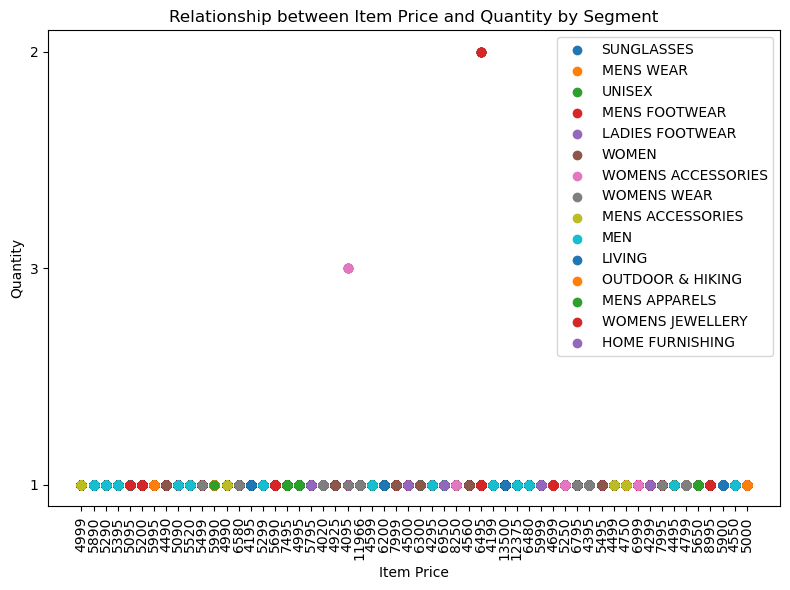

In [41]:
# Define the SQL query to calculate total sales for each segment
query = "SELECT Segment, SUM(Item_Price * Quantity) AS TotalSales FROM paytm_table GROUP BY Segment;"

# Execute the query to get total sales for each segment
df_total_sales = execute_query(query)

# Fetch Item_Price and Quantity data for scatter plot
query_scatter = "SELECT Segment, Item_Price, Quantity FROM paytm_table;"
df_scatter = execute_query(query_scatter)

# Plotting scatter plot for each segment
plt.figure(figsize=(8, 6))

for segment in df_total_sales['Segment']:
    segment_data = df_scatter[df_scatter['Segment'] == segment]
    plt.scatter(segment_data['Item_Price'], segment_data['Quantity'], label=segment)

plt.xlabel('Item Price')
plt.ylabel('Quantity')
plt.title('Relationship between Item Price and Quantity by Segment')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 18. Use the AVERAGEIFS function to find the average "Item_Price" for products that have a "Sale_Flag" of 'Yes.

In [42]:
# Define the query
query = "SELECT AVG(Item_Price) AS Average_Item_Price FROM paytm_table WHERE Sale_Flag = 'On Sale';"
# Call the function with the query
execute_query(query)

,Average_Item_Price
0,5803.229609


## 19. Identify products with a "Paid_pr" higher than the average in their respective "Family" and "Brand" groups.

In [43]:
# Define the query
query = "SELECT Category, Sub_category, Product_Gender, Segment, Class FROM paytm_table p1 INNER JOIN (SELECT Family, Brand, AVG(Paid_pr) AS AvgPaidPr FROM paytm_table GROUP BY Family, Brand ) AS avg_prices ON p1.Family = avg_prices.Family AND p1.Brand = avg_prices.Brand WHERE p1.Paid_pr > avg_prices.AvgPaidPr;"
# Call the function with the query
execute_query(query)

,Category,Sub_category,Product_Gender,Segment,Class
0,SUNGLASSES,SUNGLASSES,UNISEX,SUNGLASSES,AVIATOR
1,SUNGLASSES,SUNGLASSES,UNISEX,SUNGLASSES,AVIATOR
2,SUNGLASSES,SUNGLASSES,UNISEX,SUNGLASSES,AVIATOR
3,SUNGLASSES,SUNGLASSES,UNISEX,SUNGLASSES,AVIATOR
4,SUNGLASSES,SUNGLASSES,UNISEX,SUNGLASSES,AVIATOR
...,...,...,...,...,...
16930,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS
16931,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS
16932,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS
16933,Sports Equipment,Sports Apparel,MEN,MENS WEAR,TOPS


## 20. Create a pivot table to show the total sales for each "Color" within the "Clothing" category and use conditional formatting to highlight the highest sales.

In [44]:
# Define the query
query = "SELECT Color, SUM(Item_Price) AS Total_Sales FROM paytm_table WHERE Category IN ('Women Apparel', 'Men Apparel') GROUP BY Color;"
# Call the function with the query
execute_query(query)

,Color,Total_Sales
0,NAVY BLUE,22614700.0
1,BEIGE,723305.0
2,BLACK,2841563.0
3,BLUE,9073153.0
4,MULTI,6589440.0
5,GREEN,2891719.0


<p style="background-color:#F1C40F;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #F1C40F;">Thank you😄!!!!!!</p>